## Sentiment Analysis using RNN

####                                                                                                                                                                                        Ajay Rajkumar K
####                                                                                                                                                                                            20BAI1020

In [48]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import SimpleRNN
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers import Dropout
warnings.filterwarnings("ignore", category=FutureWarning)

In [49]:
df = pd.read_csv(r"C:\Users\Ajay\Documents\Tweets.csv")
df = df[["text","airline_sentiment"]]
df['text'] = df['text'].map(lambda x: x.lstrip('@VirginAmerica@UnitedAir@Southwestairline@DeltaAir@USAirways@American').rstrip('@'))

In [50]:
df = df[df.airline_sentiment!="neutral"] # To remove neutral responses
df['text'] = df['text'].apply(lambda x: x.lower()) # To lower 
df['text'] = df['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x))) # To keep numbers and strings only

In [51]:
df.head(5) #Quick Look 

,text,airline_sentiment
1,plus youve added commercials to the experienc...,positive
3,its really aggressive to blast obnoxious ente...,negative
4,and its a really big bad thing about it,negative
5,seriously would pay 30 a flight for seats tha...,negative
6,yes nearly every time i fly vx this ear worm ...,positive


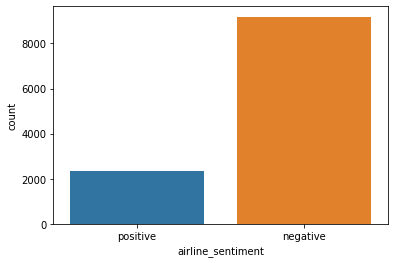

In [52]:
sns.countplot(df.airline_sentiment);

In [53]:
df = df.drop(df[df.airline_sentiment == "negative"].iloc[:5000].index) #to have similar no of positive and negative reviews

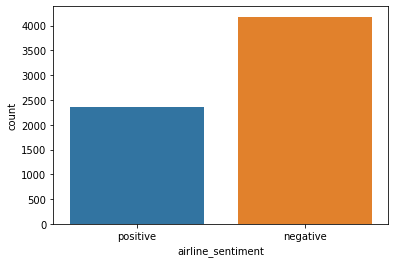

In [54]:
sns.countplot(df.airline_sentiment);

In [87]:
max_fatures = 4000
tokenizer = Tokenizer(num_words = max_fatures, split=' ')
tokenizer.fit_on_texts(df['text'].values)
X = tokenizer.texts_to_sequences(df['text'].values)
X = pad_sequences(X)
Y = df['airline_sentiment']
L = Y.values

In [88]:
k = []
for i in range(6541):
    if L[i]=="negative":
        k.append(0)
    elif L[i]=="positive":
        k.append(1)
k = np.array(k)   #converted into a numpy array, as the model fitting can be done using numpy arrays or vectors

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(X, k, test_size=0.3, shuffle = True, stratify = k, random_state = 1)
X_val = X_train[-3000:, :]
y_val = Y_train[-3000:]

## Model 1

In [64]:
model = Sequential()
model.add(Embedding(max_fatures, 128, input_length=X_train.shape[1]))
model.add(SimpleRNN(196, dropout = 0.3, recurrent_dropout = 0.3 ))
model.add(Dropout(0.2))
model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(2, activation = 'softmax'))

In [65]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [67]:
Model = model.fit(X_train,
                  Y_train,
                  epochs=20,
                  batch_size=32,
                  validation_split = 0.2,
                  verbose = 1
                 )

Epoch 1/20
115/115 [==============================] - 6s 55ms/step - loss: 0.3480 - accuracy: 0.8534 - val_loss: 0.4363 - val_accuracy: 0.8210
Epoch 2/20
115/115 [==============================] - 6s 55ms/step - loss: 0.2317 - accuracy: 0.9115 - val_loss: 0.3100 - val_accuracy: 0.9061
Epoch 3/20
115/115 [==============================] - 6s 52ms/step - loss: 0.1728 - accuracy: 0.9350 - val_loss: 0.9948 - val_accuracy: 0.7937
Epoch 4/20
115/115 [==============================] - 6s 55ms/step - loss: 0.1505 - accuracy: 0.9454 - val_loss: 1.5951 - val_accuracy: 0.6779
Epoch 5/20
115/115 [==============================] - 6s 55ms/step - loss: 0.1055 - accuracy: 0.9623 - val_loss: 1.1994 - val_accuracy: 0.7664
Epoch 6/20
115/115 [==============================] - 6s 56ms/step - loss: 0.0936 - accuracy: 0.9661 - val_loss: 0.3706 - val_accuracy: 0.9225
Epoch 7/20
115/115 [==============================] - 6s 56ms/step - loss: 0.0767 - accuracy: 0.9735 - val_loss: 1.1478 - val_accuracy: 0.7631

In [68]:
score = model.evaluate(X_test, Y_test, verbose=False)
print("loss = ",score[0])
print("accuracy = ",score[1])

loss =  0.7359414100646973
accuracy =  0.879775881767273


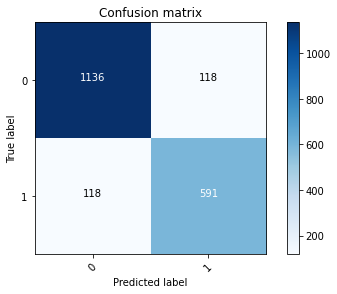

In [69]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred,axis = 1) 
confusion_mtx = confusion_matrix(Y_test, y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = range(2)) 

In [78]:
sample = ['Service is not good']
sample = tokenizer.texts_to_sequences(sample)
sample = pad_sequences(sample, maxlen=31, dtype='int32', value=0)
print(sample)
sentiment = model.predict(sample,batch_size=1,verbose = 2)[0]
print(sentiment)
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0  28  11  22 104]]
1/1 - 0s - 32ms/epoch - 32ms/step
[0.78955424 0.21044576]
negative


## Model 2

In [91]:
model = Sequential()
model.add(Embedding(max_fatures, 128, input_length=X_train.shape[1]))
model.add(SimpleRNN(128, dropout = 0.3, recurrent_dropout = 0.3 ))
model.add(Dropout(0.2))
model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(2, activation = 'softmax'))

In [92]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [93]:
Model = model.fit(X_train,
                  Y_train,
                  epochs=20,
                  batch_size=32,
                  validation_split = 0.2,
                  verbose = 1
                 )

Epoch 1/20
115/115 [==============================] - 7s 41ms/step - loss: 0.7030 - accuracy: 0.5844 - val_loss: 0.6995 - val_accuracy: 0.4312
Epoch 2/20
115/115 [==============================] - 4s 37ms/step - loss: 0.6169 - accuracy: 0.6693 - val_loss: 1.0245 - val_accuracy: 0.4782
Epoch 3/20
115/115 [==============================] - 4s 37ms/step - loss: 0.4277 - accuracy: 0.8119 - val_loss: 0.3739 - val_accuracy: 0.8264
Epoch 4/20
115/115 [==============================] - 4s 37ms/step - loss: 0.2705 - accuracy: 0.8891 - val_loss: 0.5844 - val_accuracy: 0.8079
Epoch 5/20
115/115 [==============================] - 4s 37ms/step - loss: 0.2016 - accuracy: 0.9241 - val_loss: 1.3505 - val_accuracy: 0.6867
Epoch 6/20
115/115 [==============================] - 4s 37ms/step - loss: 0.1453 - accuracy: 0.9435 - val_loss: 0.7240 - val_accuracy: 0.8166
Epoch 7/20
115/115 [==============================] - 4s 37ms/step - loss: 0.1202 - accuracy: 0.9552 - val_loss: 0.3533 - val_accuracy: 0.9007

In [94]:
score = model.evaluate(X_test, Y_test, verbose=False)
print("loss = ",score[0])
print("accuracy = ",score[1])

loss =  0.7108633518218994
accuracy =  0.901681125164032


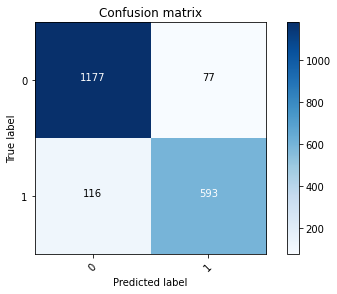

In [95]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred,axis = 1) 
confusion_mtx = confusion_matrix(Y_test, y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = range(2)) 

## Model 3

In [96]:
model = Sequential()
model.add(Embedding(max_fatures, 128, input_length=X_train.shape[1]))
model.add(SimpleRNN(64, dropout = 0.3, recurrent_dropout = 0.3 ))
model.add(Dropout(0.2))
model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(2, activation = 'softmax'))

In [97]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [98]:
Model = model.fit(X_train,
                  Y_train,
                  epochs=20,
                  batch_size=32,
                  validation_split = 0.2,
                  verbose = 1
                 )

Epoch 1/20
115/115 [==============================] - 6s 31ms/step - loss: 0.6780 - accuracy: 0.6090 - val_loss: 0.6362 - val_accuracy: 0.6365
Epoch 2/20
115/115 [==============================] - 3s 27ms/step - loss: 0.6020 - accuracy: 0.6955 - val_loss: 0.5201 - val_accuracy: 0.7522
Epoch 3/20
115/115 [==============================] - 3s 27ms/step - loss: 0.4342 - accuracy: 0.8034 - val_loss: 0.4733 - val_accuracy: 0.7784
Epoch 4/20
115/115 [==============================] - 3s 27ms/step - loss: 0.2656 - accuracy: 0.8965 - val_loss: 0.2542 - val_accuracy: 0.9116
Epoch 5/20
115/115 [==============================] - 3s 27ms/step - loss: 0.1768 - accuracy: 0.9342 - val_loss: 0.3267 - val_accuracy: 0.8919
Epoch 6/20
115/115 [==============================] - 3s 27ms/step - loss: 0.1484 - accuracy: 0.9481 - val_loss: 0.3585 - val_accuracy: 0.9094
Epoch 7/20
115/115 [==============================] - 3s 27ms/step - loss: 0.1133 - accuracy: 0.9610 - val_loss: 0.5489 - val_accuracy: 0.8821

In [99]:
score = model.evaluate(X_test, Y_test, verbose=False)
print("loss = ",score[0])
print("accuracy = ",score[1])

loss =  0.7167290449142456
accuracy =  0.8914926052093506


### Inferences:

1. There are 3 models with different number of RNN units in a layer - **196, 128 and 64** units.
2. The model with 128 units in a layer provided the highest accuracy of **90.16%**
3. Model with **196** units did not perform as expected, as it was an overkill for such an application.
4. Validation loss and accuracy was very erratic after each and every epoch, for all 3 models, suggesting that the model might be given random predictions.